# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [552]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [553]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [554]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [555]:
# 2. Get the total drivers for each city type
type_driver_sum = pyber_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_sum

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [556]:
#  3. Get the total amount of fares for each city type
type_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_sum

type
Rural       $4,327.93
Suburban   $19,356.33
Urban      $39,854.38
Name: fare, dtype: float64

In [557]:
#  4. Get the average fare per ride for each city type. 
average_ride_fare = type_fare_sum/type_ride_count
average_ride_fare

type
Rural      $34.62
Suburban   $30.97
Urban      $24.53
dtype: float64

In [558]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = type_fare_sum/type_driver_sum
average_driver_fare

type
Rural      $8.06
Suburban   $2.26
Urban      $0.67
dtype: float64

In [559]:
#  6. Create a PyBer summary DataFrame. 
summary_data = (type_ride_count, type_driver_sum, type_fare_sum, average_ride_fare, average_driver_fare)
pyber_summary_df = pd.DataFrame(summary_data)
summary_df = pyber_summary_df.T.rename(columns={'ride_id': 'Total Rides', 'driver_count': 'Total Drivers', 'fare': 'Total Fares', 'Unnamed 0': 'Average Fare per Ride', 'Unnamed 1': 'Average Fare per Driver'})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,$125.00,$537.00,"$4,327.93",$34.62,$8.06
Suburban,$625.00,"$8,570.00","$19,356.33",$30.97,$2.26
Urban,"$1,625.00","$59,602.00","$39,854.38",$24.53,$0.67


In [560]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,$125.00,$537.00,"$4,327.93",$34.62,$8.06
Suburban,$625.00,"$8,570.00","$19,356.33",$30.97,$2.26
Urban,"$1,625.00","$59,602.00","$39,854.38",$24.53,$0.67


In [561]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
summary_df['Total Rides'] = summary_df['Total Rides'].astype(int)
summary_df['Total Drivers'] = summary_df['Total Drivers'].astype(int)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [562]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [563]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33

In [564]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = df.reset_index()
df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33


In [565]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot = df.pivot(index='date', columns='type', values='fare')
df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [566]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_pivot_dates = df_pivot.loc['2019-01-01':'2019-04-29']
df_pivot_dates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,$11.46
2019-04-28 16:29:16,NaN,NaN,$36.42
2019-04-28 17:26:52,NaN,NaN,$31.43


In [567]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_pivot_dates.index = pd.to_datetime(df_pivot_dates.index)

In [568]:
# 7. Check that the datatype for the index is datetime using df.info()
df_pivot_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [569]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
results_df = df_pivot_dates.resample('W').sum()
results_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


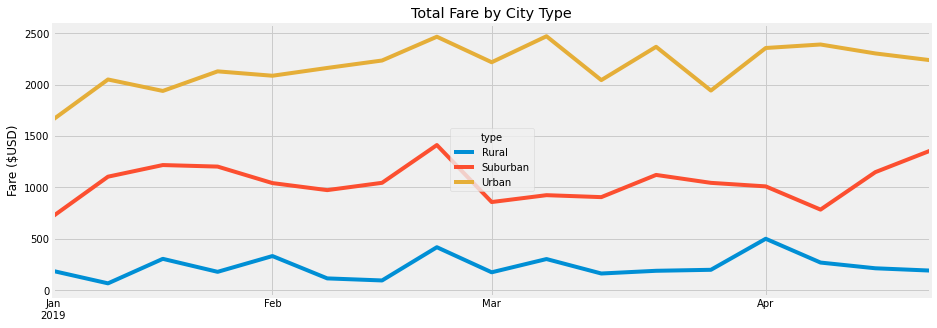

In [570]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
results_chart = results_df.plot(title='Total Fare by City Type', xlabel='', ylabel='Fare ($USD)', figsize=(14,5))

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



In [571]:
results_chart.get_figure().savefig('PyBer_fare_summary.png')